# Gerekli Paketlerin Importlanmasi #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Yukleme ve Duzenleme #

In [2]:
df = pd.read_csv('salary.csv')

In [3]:
df.head()

,Time,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary
0,2023-01-22 18:49:36.202,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL
1,2023-01-22 18:49:38.280,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL
2,2023-01-22 18:49:41.383,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL
3,2023-01-22 18:50:19.296,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL
4,2023-01-22 18:51:13.644,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL


In [4]:
df.drop('Time', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position          1164 non-null   object
 1   Level             1164 non-null   object
 2   Experience        1164 non-null   object
 3   Technology        1164 non-null   object
 4   Location          1164 non-null   object
 5   Way_of_working    1164 non-null   object
 6   Employees_number  1164 non-null   object
 7   Salary_type       1164 non-null   object
 8   Salary            1164 non-null   object
dtypes: object(9)
memory usage: 82.0+ KB


In [6]:
df.isnull().sum()

Position            0
Level               0
Experience          0
Technology          0
Location            0
Way_of_working      0
Employees_number    0
Salary_type         0
Salary              0
dtype: int64

In [7]:
df['Min_Salary'] = df['Salary'].apply(lambda x: x.split('-')[0][:-1])
df['Max_Salary'] = df["Salary"].apply(lambda x: x.split("-")[1][1:7] if len(x.split("-")) > 1  else np.nan)

In [8]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,Min_Salary,Max_Salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41.000,45.000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51.000,55.000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16.000,20.000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41.000,45.000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11.000,15.000


In [9]:
df['Min_Salary'] = df['Min_Salary'].apply(lambda x: x.replace('.',''))
df['Max_Salary'] = df['Max_Salary'].apply(lambda x: x.replace('.','') if x is not np.nan else x)

In [10]:
df['Min_Salary'].unique()

array(['41000', '51000', '16000', '11000', '21000', '5000', '31000',
       '56000', '91000', '26000', '101000', '36000', '151000', '81000',
       '71000', '66000', '46000', '121000', '61000', '200000+ T'],
      dtype=object)

In [11]:
df['Min_Salary'] = df['Min_Salary'].apply(lambda x: '200000' if x=='200000+ T' else x)

In [12]:
df['Min_Salary'].unique()

array(['41000', '51000', '16000', '11000', '21000', '5000', '31000',
       '56000', '91000', '26000', '101000', '36000', '151000', '81000',
       '71000', '66000', '46000', '121000', '61000', '200000'],
      dtype=object)

In [13]:
df['Max_Salary'].unique()

array(['45000', '55000', '20000', '15000', '25000', '10000', '35000',
       '60000', '30000', '12000', '40000', '90000', '80000', '70000',
       '50000', '65000', nan], dtype=object)

In [14]:
max_null_value_index = df[df['Max_Salary'].isnull()]['Max_Salary'].index
for i in max_null_value_index:
    df['Max_Salary'][i] = df['Min_Salary'][i]

In [15]:
df['Max_Salary'].unique()

array(['45000', '55000', '20000', '15000', '25000', '10000', '35000',
       '60000', '30000', '12000', '40000', '90000', '80000', '70000',
       '50000', '65000', '200000'], dtype=object)

In [16]:
df['Avg_Salary'] = (df['Min_Salary'].astype(int) + df['Max_Salary'].astype(int)) / 2
df['Avg_Salary']=df['Avg_Salary'].astype(int)

In [17]:
df['Min_Salary'] = df['Min_Salary'].astype(int)
df['Max_Salary'] = df['Max_Salary'].astype(int)

In [18]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,Min_Salary,Max_Salary,Avg_Salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000,53000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000,18000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000,13000


In [19]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.replace('/','') if '/' in x else x)

In [20]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else x)

In [21]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.replace('Yerinde','Ofiste') if 'Yerinde' in x else x)

In [22]:
df['Way_of_working'] = df['Way_of_working'].apply(lambda x: x.replace(' ',''))

In [23]:
df['Way_of_working'].unique()

array(['Ofiste', 'Remote', 'Hybrid'], dtype=object)

## Calisma Sekline Gore Calisan Sayisi #

Text(0, 0.5, 'Sayi')

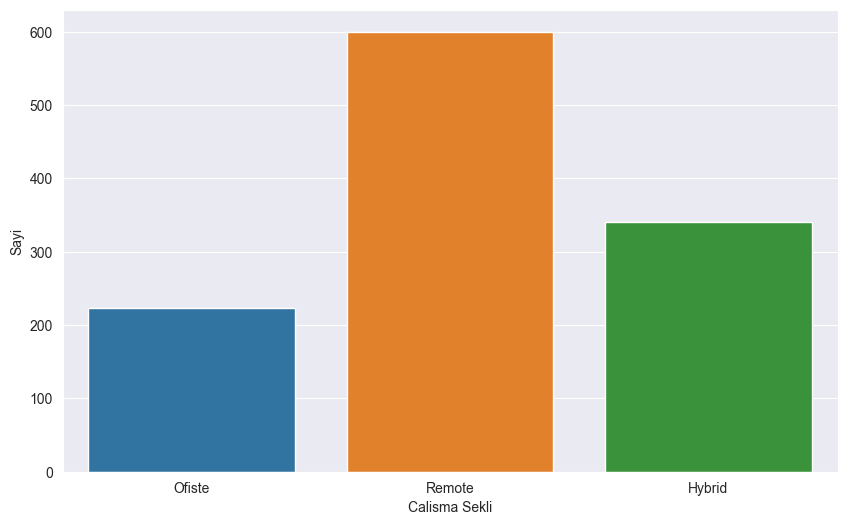

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Way_of_working')
plt.xlabel('Calisma Sekli')
plt.ylabel('Sayi')

# Deneyim Duzeyleri #

In [25]:
df['Level'].value_counts()

Level
Junior      446
Mid         375
Senior      299
Tanımsız     44
Name: count, dtype: int64

In [26]:
df['Level'].unique

<bound method Series.unique of 0            Mid
1       Tanımsız
2         Junior
3            Mid
4         Junior
          ...   
1159      Senior
1160         Mid
1161      Junior
1162         Mid
1163      Junior
Name: Level, Length: 1164, dtype: object>

In [27]:
df['Level'] = df['Level'].apply(lambda x: x.replace(' ',''))

In [28]:
df['Level'].value_counts()

Level
Junior      446
Mid         375
Senior      299
Tanımsız     44
Name: count, dtype: int64

In [29]:
def modify_exp(data):
    if data['Level']=='Tanımsız':
        if data['Experience'] == '1-3 Yıl' or data['Experience']=='0-1 Yıl':
            return 'Junior'
        elif data['Experience'] == '4-6 Yıl':
            return 'Mid'
        elif data['Experience'] == '7-10 Yıl' or data['Experience']=='10+ Yıl':
            return 'Senior'
    else:
        return data['Level']

In [30]:
df['Level'] = df.apply(modify_exp, axis=1)

Text(0.5, 1.0, 'Deneyim Duzeylerinin Dagilimlari')

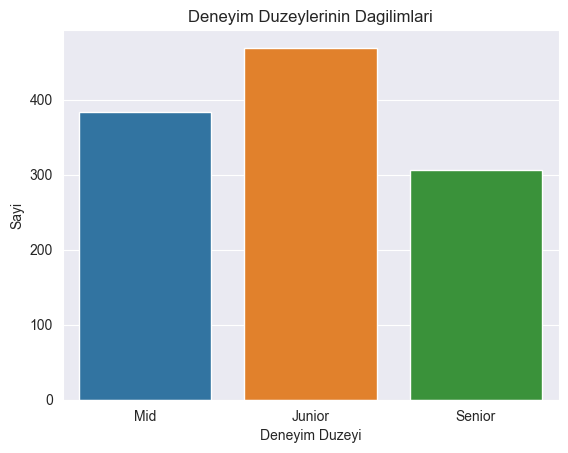

In [31]:
sns.countplot(data=df, x='Level')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Sayi')
plt.title('Deneyim Duzeylerinin Dagilimlari')

Text(0.5, 1.0, 'Deneyim Duzeylerinin Dagilimlari')

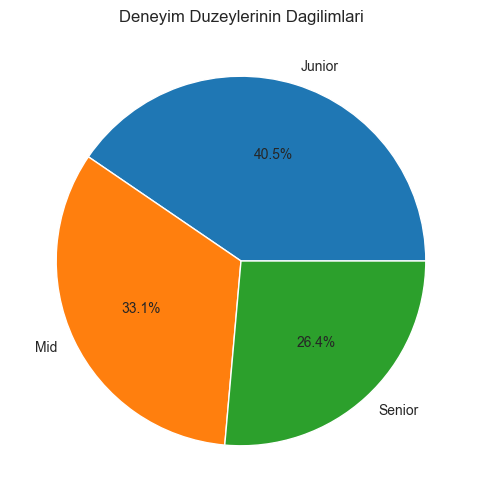

In [32]:
fig = plt.figure(figsize=(10,6))
plt.pie(df['Level'].value_counts(), labels=df['Level'].value_counts().index, autopct='%1.1f%%')
plt.title('Deneyim Duzeylerinin Dagilimlari')

In [33]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,Min_Salary,Max_Salary,Avg_Salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000
1,Architect / Mimar,Mid,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000,53000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000,18000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000,13000


In [34]:
df['Level'].value_counts()

Level
Junior    469
Mid       384
Senior    306
Name: count, dtype: int64

In [35]:
df['Min_experience'] = df['Experience'].apply(lambda x: x.split('-')[0])
df['Max_experience'] = df['Experience'].apply(lambda x: x.split('-')[1][:1] if len(x.split('-')) > 1  else np.nan)

In [36]:
df['Min_experience'] = df['Min_experience'].apply(lambda x: '10' if x=='10+ Yıl' else x)

In [37]:
df['Min_experience'].unique()

array(['1', '4', '0', '10', '7'], dtype=object)

In [38]:
max_exp_null_variable_index = df[df['Max_experience'].isnull()]['Max_experience'].index
for i in max_exp_null_variable_index:
    df['Max_experience'][i] = df['Min_experience'][i]

C:\Users\mired\AppData\Local\Temp\ipykernel_19932\2040887640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_experience'][i] = df['Min_experience'][i]
C:\Users\mired\AppData\Local\Temp\ipykernel_19932\2040887640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_experience'][i] = df['Min_experience'][i]
C:\Users\mired\AppData\Local\Temp\ipykernel_19932\2040887640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

Text(0.5, 1.0, 'Deneyim Seviyelerine Gore Dagilimlar')

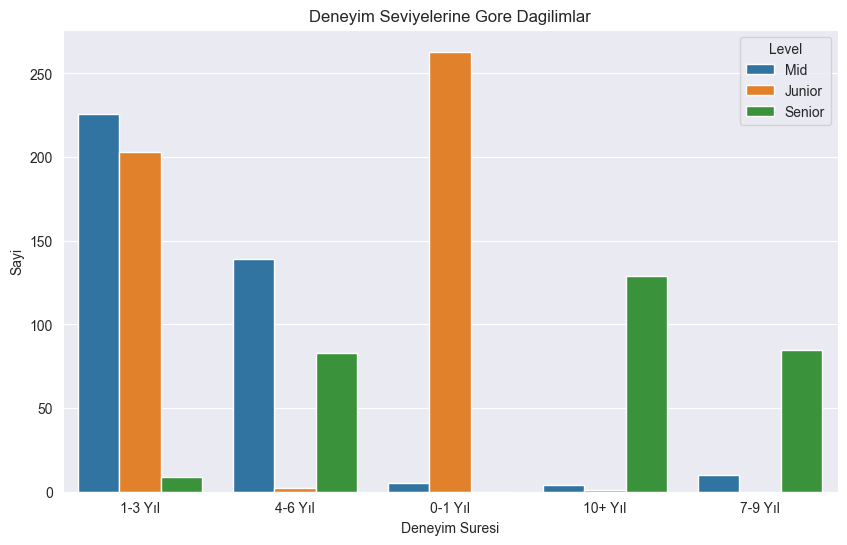

In [39]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Experience', hue='Level')
plt.xlabel('Deneyim Suresi')
plt.ylabel('Sayi')
plt.title('Deneyim Seviyelerine Gore Dagilimlar')

Text(0.5, 1.0, 'Deneyim Surelerine Gore Dagilimlar')

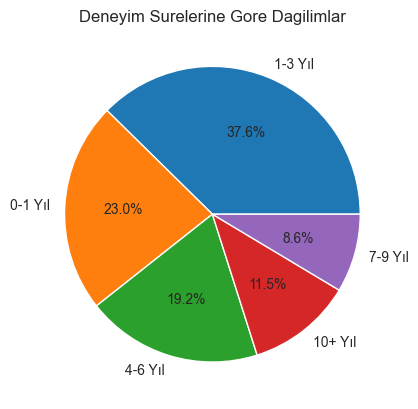

In [40]:
plt.pie(df['Experience'].value_counts(), labels=df['Experience'].value_counts().index, autopct='%1.1f%%')
plt.title('Deneyim Surelerine Gore Dagilimlar')

# Calisan Sayisi #

Text(0.5, 1.0, 'Calisan Sayilarinin Gore Dagilimlari')

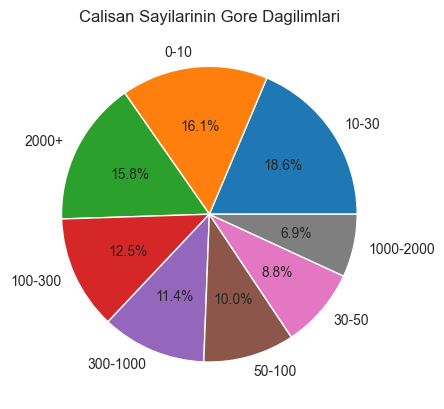

In [41]:
plt.pie(df['Employees_number'].value_counts(), labels=df['Employees_number'].value_counts().index, autopct='%1.1f%%')
plt.title('Calisan Sayilarinin Gore Dagilimlari')

# Lokasyon #

Text(0.5, 1.0, 'Lokasyon Dagilimlari')

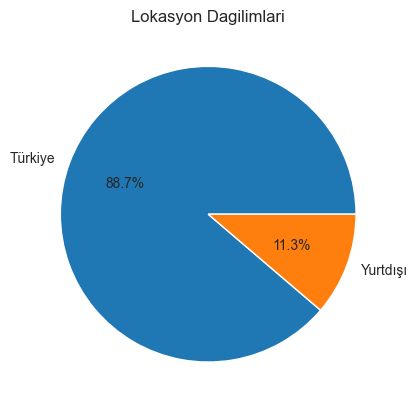

In [42]:
plt.pie(df['Location'].value_counts(), labels=df['Location'].value_counts().index, autopct='%1.1f%%')
plt.title('Lokasyon Dagilimlari')

# Maas Dagilimi #

In [43]:
def maas_duzenleme(x):
    if x == "Maaş TL Primler Dolar" or x == 25000 or x == 11500 or x == "Dolar bazlı TL" or x == "Dolar endeksli Türk lirası(2 ayda bir dolara göre zam)":
        return "Türk Lirası"
    elif x == 1250 or x == "250 Dolar 4700tl ortalama" or x == "USDT" or x == 1500 or x == 3000:
        return "Dolar"
    elif x == "CAD":
        return "Canadian Dolar"
    else:
        return x

In [44]:
df['Salary'] = df['Salary'].apply(maas_duzenleme)

In [56]:
yurt_ici = df[df['Location']=='Türkiye']
yurt_disi = df[df['Location']!='Türkiye']

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min_Salary,1164.0,27390.893471,24645.712191,5000.0,11000.0,21000.0,31000.0,200000.0
Max_Salary,1164.0,28362.542955,18974.504478,10000.0,15000.0,25000.0,35000.0,200000.0
Avg_Salary,1164.0,27876.718213,19966.966681,7500.0,13000.0,23000.0,33000.0,200000.0


Text(0.5, 1.0, 'Deneyim Duzeylerine Gore Ortalama Maas Dagilimlari')

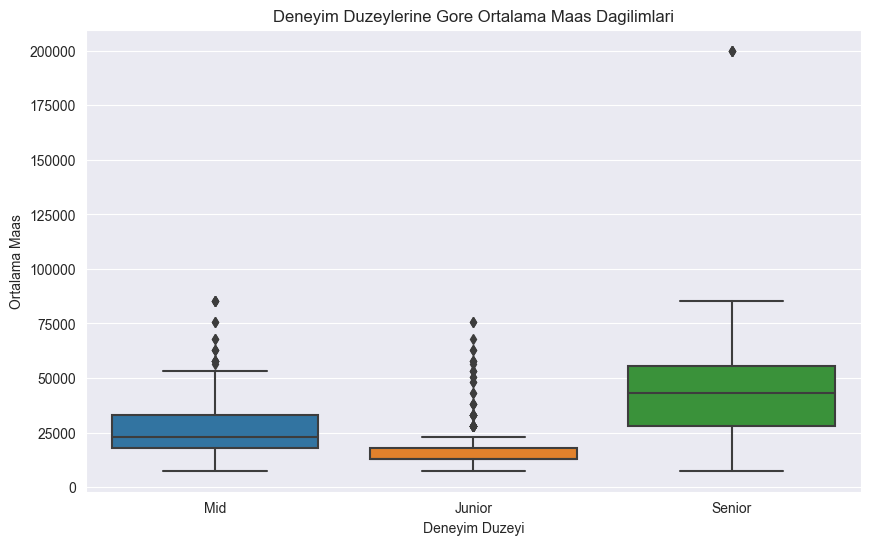

In [52]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Level', y='Avg_Salary')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Ortalama Maas')
plt.title('Deneyim Duzeylerine Gore Ortalama Maas Dagilimlari')

Text(0.5, 1.0, 'Turkiye de Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

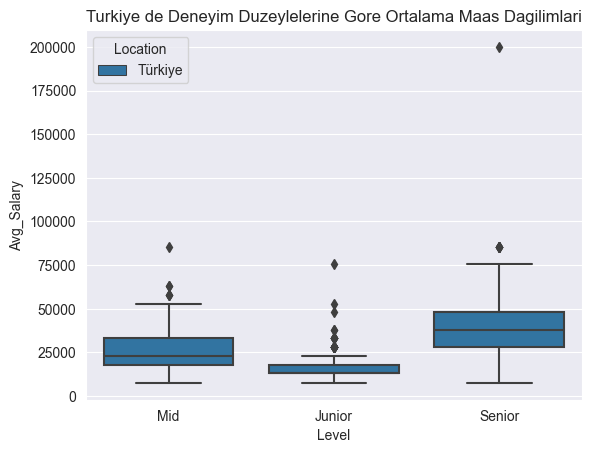

In [63]:
sns.boxplot(data=yurt_ici, x='Level', y='Avg_Salary',hue='Location')
plt.title('Turkiye de Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

Text(0.5, 1.0, 'Yurt Disinda Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

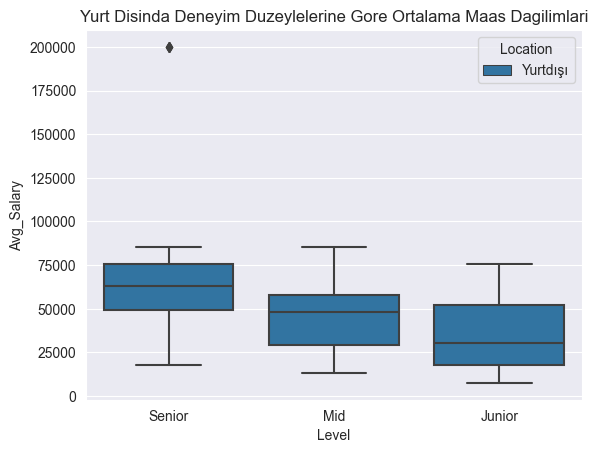

In [64]:
sns.boxplot(data=yurt_disi, x='Level', y='Avg_Salary',hue='Location')
plt.title('Yurt Disinda Deneyim Duzeylelerine Gore Ortalama Maas Dagilimlari')

Text(0, 0.5, 'Sayi')

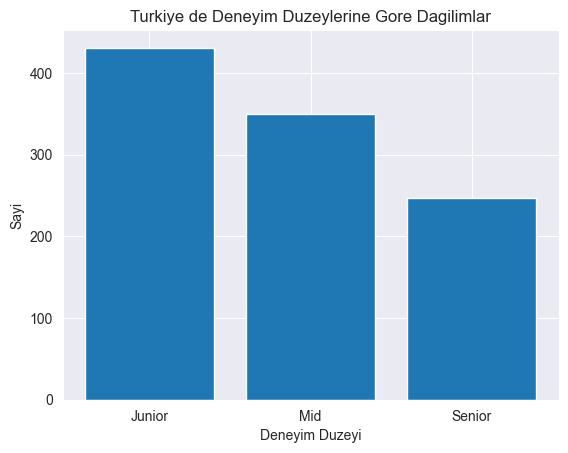

In [73]:
plt.bar(yurt_ici['Level'].value_counts().index, yurt_ici['Level'].value_counts().values)
plt.title('Turkiye de Deneyim Duzeylerine Gore Dagilimlar')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Sayi')

([<matplotlib.patches.Wedge at 0x27bc13ad420>,
 [Text(0.2760326732459917, 1.0648032509814533, 'Junior'),
  Text(-0.9306293038385527, -0.586454686090043, 'Mid'),
  Text(0.8012208644014519, -0.7536876849516585, 'Senior')],
 [Text(0.15056327631599545, 0.5808017732626108, '41.9%'),
  Text(-0.5076159839119377, -0.3198843742309325, '34.0%'),
  Text(0.4370295624007919, -0.4111023736099955, '24.0%')])

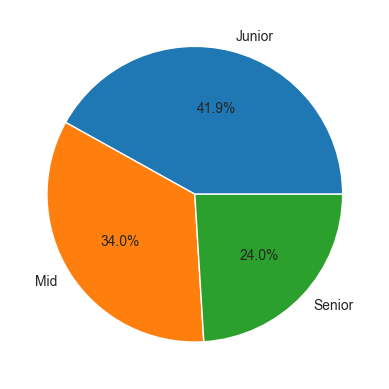

In [69]:
plt.pie(yurt_ici['Level'].value_counts(), labels=yurt_ici['Level'].value_counts().index, autopct='%1.1f%%')

Text(0, 0.5, 'Sayi')

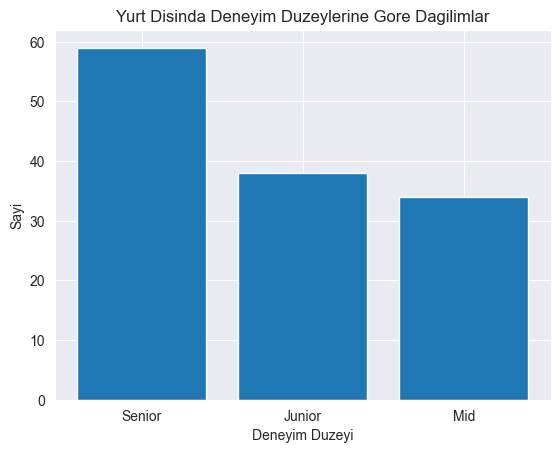

In [74]:
plt.bar(yurt_disi['Level'].value_counts().index, yurt_disi['Level'].value_counts().values)
plt.title('Yurt Disinda Deneyim Duzeylerine Gore Dagilimlar')
plt.xlabel('Deneyim Duzeyi')
plt.ylabel('Sayi')

Text(0.5, 1.0, 'Yurt Disinda Deneyim Duzeylerine Gore Dagilimlar')

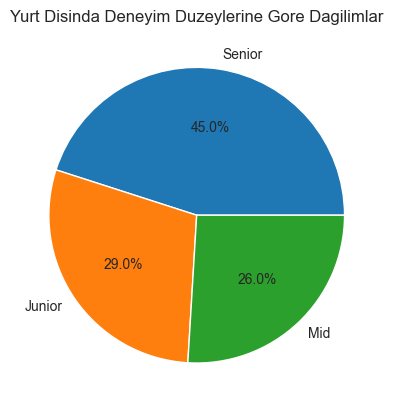

In [71]:
plt.pie(yurt_disi['Level'].value_counts(), labels=yurt_disi['Level'].value_counts().index, autopct='%1.1f%%')
plt.title('Yurt Disinda Deneyim Duzeylerine Gore Dagilimlar')

<Axes: xlabel='Location', ylabel='Avg_Salary'>

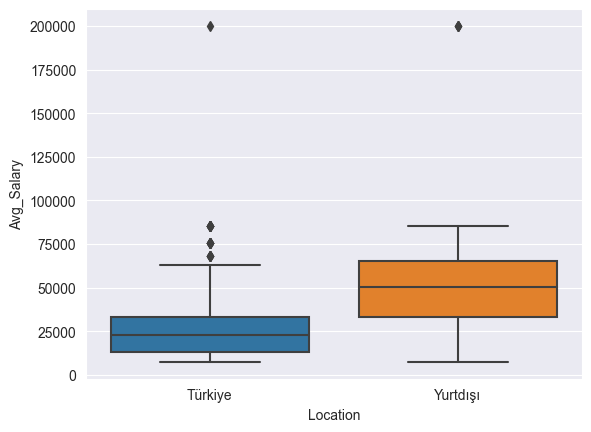

In [61]:
sns.boxplot(data=df, x='Location', y='Avg_Salary')

In [81]:
yurt_ici_jr = yurt_ici[yurt_ici['Level']=='Junior'].value_counts().sum()
yurt_ici_mid = yurt_ici[yurt_ici['Level']=='Mid'].value_counts().sum()
yurt_ici_sr = yurt_ici[yurt_ici['Level']=='Senior'].value_counts().sum()

In [82]:
yurt_disi_jr = yurt_disi[yurt_disi['Level']=='Junior'].value_counts().sum()
yurt_disi_mid = yurt_disi[yurt_disi['Level']=='Mid'].value_counts().sum()
yurt_disi_sr = yurt_disi[yurt_disi['Level']=='Senior'].value_counts().sum()

Text(0.5, 1.0, 'Juniorlarin Calistigi Ulkelere Gore Dagilimlari')

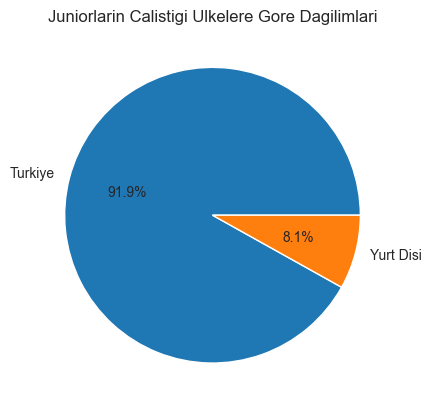

In [91]:
plt.pie([yurt_ici_jr, yurt_disi_jr], labels=['Turkiye', 'Yurt Disi'], autopct='%1.1f%%')
plt.title("Juniorlarin Calistigi Ulkelere Gore Dagilimlari")